In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten

In [14]:
train_dir = 'Black2/train'
validate_dir = 'Black2/valid'

label = ['Apple', 'Lemon', 'Mango', 'Orage', 'Bell pepper', 'Pear', 'Plums', 'Strawberries']

train_data_gen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_data_gen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(500, 500),
    class_mode='categorical'
)

validation_generator = validation_data_gen.flow_from_directory(
    validate_dir,
    target_size=(500, 500),
    class_mode='categorical'
)


# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

Found 142 images belonging to 8 classes.
Found 77 images belonging to 8 classes.


In [15]:

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8, activation='softmax'))

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    #optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x=train_generator,
    validation_data=validation_generator,
    batch_size=32,
    epochs=30
)

model.save('model_4.h5')

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 170s 29s/step - accuracy: 0.1810 - loss: 22.2034 - val_accuracy: 0.2208 - val_loss: 2.1776
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 109s 22s/step - accuracy: 0.2048 - loss: 2.1347 - val_accuracy: 0.2208 - val_loss: 1.7204
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 110s 22s/step - accuracy: 0.2588 - loss: 1.8261 - val_accuracy: 0.3766 - val_loss: 1.7798
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 113s 22s/step - accuracy: 0.3641 - loss: 2.1904 - val_accuracy: 0.4156 - val_loss: 1.7198
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 109s 18s/step - accuracy: 0.4582 - loss: 1.5746 - val_accuracy: 0.5844 - val_loss: 1.1689
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 120s 19s/step - accuracy: 0.4133 - loss: 1.8626 - val_accuracy: 0.3117 - val_loss: 1.6570
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 91s 17s/step - accuracy: 0.3926 - loss: 1.5728 - val_accuracy: 0.4416 - val_loss: 1.1968
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 98s 19s/step - accuracy: 0.4951 - loss: 1.2886 - val_accuracy: 0.3896 - val_loss: 

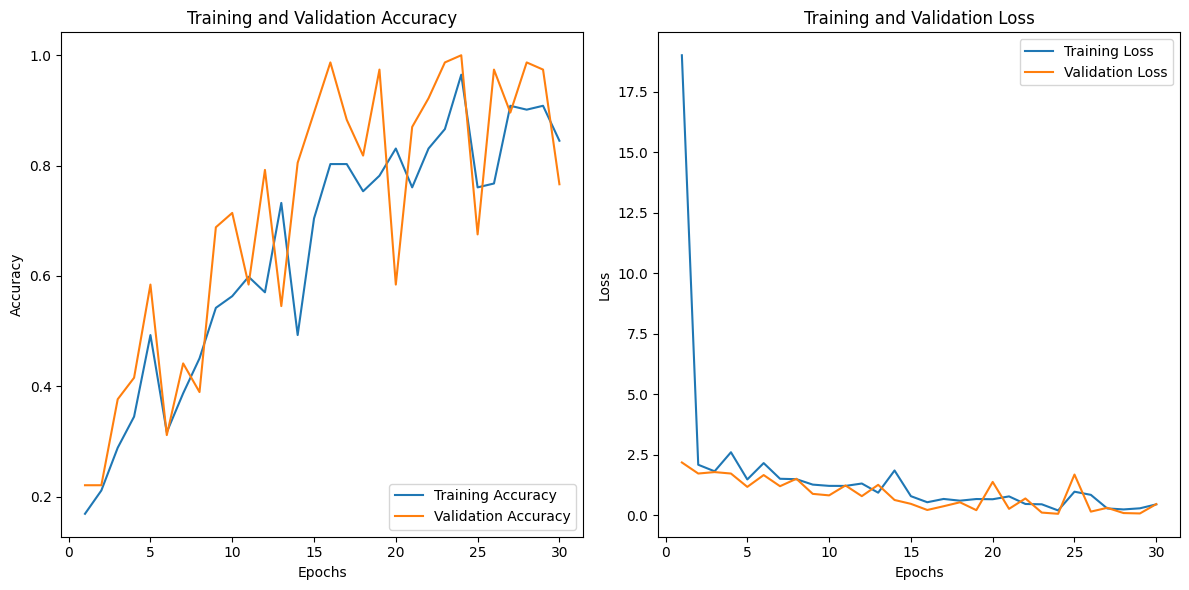

In [16]:

# Plot and visualize training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()
